# Objectives

The objective of this notebook is to provide a solution to the questions for the P2 Coding Challenge. This would showcase coding skills that covers data collection and analysis techniques.

## Interacting with the API to request the data

In [75]:
import pandas as pd
import numpy as np
import json

import urllib
import requests

from io import StringIO

In [76]:
# API call datastore_search

action = 'https://data.gov.au/data/api/3/action/datastore_search?'
resource_id = 'resource_id=809c77d8-fd68-4a2c-806f-c63d64e69842'

url = action + resource_id

def collect_data_API_request(url,rows_retrieve):
    ''' the function is used to interact with the API and collect data.
    url: url for http request to API
    rows_retrieve parameter: number of rows requested (int) or All
    '''
    
    # setting if rows_retrieve = 'All', code will get the total from the 
    if rows_retrieve == 'All':
        with urllib.request.urlopen(url + '&limit=1') as response:
            data = response.read()
        JSONContent = requests.get(url).json()
        content = json.dumps(JSONContent, indent=4, sort_keys=True)
        df_content = pd.read_json(StringIO(content))
        max_content = df_content['result']['total']
        limit = '&limit='+ str(max_content)
        
        url = url + limit
        
        # re-retrieve using the maximum number of rows from gathered from the API call
        with urllib.request.urlopen(url) as response:
            data = response.read()
        JSONContent = requests.get(url).json()
        content = json.dumps(JSONContent, indent=4, sort_keys=True)
        df_content = pd.read_json(StringIO(content))
        df = pd.json_normalize(df_content['result']['records'])
    
    # setting if rows_retrieve = integer (will use &limit= number of rows requested)
    else:
        limit = '&limit='+ str(rows_retrieve)
        url = url + limit
        with urllib.request.urlopen(url) as response:
            data = response.read()
        JSONContent = requests.get(url).json()
        content = json.dumps(JSONContent, indent=4, sort_keys=True)
        df_content = pd.read_json(StringIO(content))
        df = pd.json_normalize(df_content['result']['records'])
        
    return df

df = collect_data_API_request(url,rows_retrieve='All')

# Data Exploration

The exploratory analysis aims to get acquainted with the data and answer the 3 questions given.

In [89]:
# look into the top data example
df.head(3)

,Airline,Freight_In_(tonnes),Freight_Out_(tonnes),Mail_In_(tonnes),Mail_Out_(tonnes),Month,Month_num,Passengers_In,Passengers_Out,Port_Country,Year,_id
0,Qantas Airways,213.459,86.277,37.112,13.115,Dec-17,12,6542,7112,Thailand,2017,39224
1,Air France,13.081,4.797,3.191,0.208,Sep-95,9,694,383,France,1995,11233
2,Merpati Nusantara Airlines,0,0,0,0,Sep-07,9,160,180,Indonesia,2007,26264


In [78]:
# looking into data types post read
# Note: there are some null values which needs to be assessed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43457 entries, 0 to 43456
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Airline               43457 non-null  object
 1   Freight_In_(tonnes)   43439 non-null  object
 2   Freight_Out_(tonnes)  43449 non-null  object
 3   Mail_In_(tonnes)      43439 non-null  object
 4   Mail_Out_(tonnes)     43449 non-null  object
 5   Month                 43457 non-null  object
 6   Month_num             43457 non-null  object
 7   Passengers_In         43424 non-null  object
 8   Passengers_Out        43425 non-null  object
 9   Port_Country          43457 non-null  object
 10  Year                  43457 non-null  object
 11  _id                   43457 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 4.0+ MB


In [79]:
# show how many null values
df.isnull().sum()

Airline                  0
Freight_In_(tonnes)     18
Freight_Out_(tonnes)     8
Mail_In_(tonnes)        18
Mail_Out_(tonnes)        8
Month                    0
Month_num                0
Passengers_In           33
Passengers_Out          32
Port_Country             0
Year                     0
_id                      0
dtype: int64

In [80]:
# show number of unique entries
df.nunique()

Airline                   197
Freight_In_(tonnes)     32307
Freight_Out_(tonnes)    34457
Mail_In_(tonnes)        13762
Mail_Out_(tonnes)       11325
Month                     438
Month_num                  12
Passengers_In           16033
Passengers_Out          15885
Port_Country               84
Year                       37
_id                     43457
dtype: int64

Investigating null values for Passengers

In [81]:
# There are no zero values for the Passengers Out/In
print("Passengers_Out:" + str(df[df['Passengers_Out']==0].shape[0]))
print("Passengers_In:" + str(df[df['Passengers_In']==0].shape[0]))

Passengers_Out:0
Passengers_In:0


In [82]:
# null values then to be Freight/Mail flights, assume Passengers = 0 when values are null
df[df['Passengers_Out'].isnull()].head() 

,Airline,Freight_In_(tonnes),Freight_Out_(tonnes),Mail_In_(tonnes),Mail_Out_(tonnes),Month,Month_num,Passengers_In,Passengers_Out,Port_Country,Year,_id
1558,QantasAirways,91.702,0,0,0,Mar-20,3,None,None,Korea,2020,42251
2735,Pacific Air Express,2.19,21.312,0,0,Feb-20,2,None,None,Papua New Guinea,2020,42130
4969,PolarAirCargo,None,123.433,None,0,Mar-20,3,None,None,Korea,2020,42243
6677,FederalExpressCorporation,None,2342.839,None,0,Mar-20,3,None,None,China,2020,42214
8239,Emirates,345.661,None,0,None,Feb-20,2,None,None,USA,2020,42102


In [83]:
# example of a Non Passenger flight
df[df['Airline']=='FederalExpressCorporation']

,Airline,Freight_In_(tonnes),Freight_Out_(tonnes),Mail_In_(tonnes),Mail_Out_(tonnes),Month,Month_num,Passengers_In,Passengers_Out,Port_Country,Year,_id
6677,FederalExpressCorporation,None,2342.839,None,0,Mar-20,3,None,None,China,2020,42214
30672,FederalExpressCorporation,1179.367,None,0,None,Mar-20,3,None,None,USA,2020,42216
36888,FederalExpressCorporation,1235.227,None,0,None,Mar-20,3,None,None,Singapore,2020,42215


Investigating null values for Freight

In [84]:
# when Freight In is None there is value in Freight Out and vice versa
df[df['Freight_In_(tonnes)'].isnull()].head()

,Airline,Freight_In_(tonnes),Freight_Out_(tonnes),Mail_In_(tonnes),Mail_Out_(tonnes),Month,Month_num,Passengers_In,Passengers_Out,Port_Country,Year,_id
4969,PolarAirCargo,None,123.433,None,0,Mar-20,3,None,None,Korea,2020,42243
6677,FederalExpressCorporation,None,2342.839,None,0,Mar-20,3,None,None,China,2020,42214
8270,UnitedParcelService,None,719.58,None,0,Mar-20,3,None,None,Korea,2020,42277
10260,Qantas Airways,None,127.01,None,0,Feb-20,2,None,None,Malaysia,2020,42141
12470,QantasAirways,None,124.645,None,0,Mar-20,3,None,None,Taiwan,2020,42258


In [85]:
# vise versa
df[df['Freight_Out_(tonnes)'].isnull()].head()

,Airline,Freight_In_(tonnes),Freight_Out_(tonnes),Mail_In_(tonnes),Mail_Out_(tonnes),Month,Month_num,Passengers_In,Passengers_Out,Port_Country,Year,_id
8239,Emirates,345.661,None,0,None,Feb-20,2,None,None,USA,2020,42102
13407,Federal Express Corporation,982.993,None,0,None,Feb-20,2,None,None,Singapore,2020,42106
21723,UnitedParcelService,1278.3,None,0,None,Mar-20,3,None,None,USA,2020,42279
30450,KalittaAir,74.254,None,0,None,Mar-20,3,None,None,USA,2020,42232
30672,FederalExpressCorporation,1179.367,None,0,None,Mar-20,3,None,None,USA,2020,42216


Investigating Mail out/in null values

In [91]:
# Similarly, shows Freight Airlines for Mail/Freight Out having None  when Freight/Main In have values
df[df['Mail_Out_(tonnes)'].isnull()].head()

,Airline,Freight_In_(tonnes),Freight_Out_(tonnes),Mail_In_(tonnes),Mail_Out_(tonnes),Month,Month_num,Passengers_In,Passengers_Out,Port_Country,Year,_id
8239,Emirates,345.661,None,0,None,Feb-20,2,None,None,USA,2020,42102
13407,Federal Express Corporation,982.993,None,0,None,Feb-20,2,None,None,Singapore,2020,42106
21723,UnitedParcelService,1278.3,None,0,None,Mar-20,3,None,None,USA,2020,42279
30450,KalittaAir,74.254,None,0,None,Mar-20,3,None,None,USA,2020,42232
30672,FederalExpressCorporation,1179.367,None,0,None,Mar-20,3,None,None,USA,2020,42216


In [92]:
# vise versa of previous
df[df['Mail_In_(tonnes)'].isnull()].head()

,Airline,Freight_In_(tonnes),Freight_Out_(tonnes),Mail_In_(tonnes),Mail_Out_(tonnes),Month,Month_num,Passengers_In,Passengers_Out,Port_Country,Year,_id
4969,PolarAirCargo,None,123.433,None,0,Mar-20,3,None,None,Korea,2020,42243
6677,FederalExpressCorporation,None,2342.839,None,0,Mar-20,3,None,None,China,2020,42214
8270,UnitedParcelService,None,719.58,None,0,Mar-20,3,None,None,Korea,2020,42277
10260,Qantas Airways,None,127.01,None,0,Feb-20,2,None,None,Malaysia,2020,42141
12470,QantasAirways,None,124.645,None,0,Mar-20,3,None,None,Taiwan,2020,42258


### Null values analysis and assumptions made
The analysis can assume that all "None or Null" values indicate a volume equivalent to 0. For example:  <br>

1. Airline with value "FederalExpressCorporation" (also known as FEDEX) which is a freight company and not a passenger company, explains the null values on Passengers_In/Out fields.

2. Freight/Mail "In" with null values will have Freight/Mail "Out" values, which could indicate that it is a specialised flight.

In [93]:
# Assign correct data types for fields.
df['Month'] = pd.to_datetime(df['Month'],format='%b-%y')

# assume null values as zero based on the previous analysis
df['Freight_In_(tonnes)'] = df['Freight_In_(tonnes)'].fillna('0').astype('float')
df['Freight_Out_(tonnes)'] = df['Freight_Out_(tonnes)'].fillna('0').astype('float')
df['Passengers_In'] = df['Passengers_In'].fillna('0').astype('float')
df['Passengers_Out'] = df['Passengers_Out'].fillna('0').astype('float')
df['Mail_In_(tonnes)'] = df['Mail_In_(tonnes)'].fillna('0').astype('float')
df['Mail_Out_(tonnes)'] = df['Mail_Out_(tonnes)'].fillna('0').astype('float')

df['Month_num'] = df['Month_num'].astype('int')

In [95]:
# basic summary statistics to look into volumes
df.describe()

,Freight_In_(tonnes),Freight_Out_(tonnes),Mail_In_(tonnes),Mail_Out_(tonnes),Month_num,Passengers_In,Passengers_Out,_id
count,43457.000000,43457.000000,43457.000000,43457.000000,43457.000000,43457.000000,43457.000000,43457.000000
mean,296.282131,268.724990,14.361627,8.443977,6.465840,8154.658559,8042.100214,21729.000000
std,668.669115,613.469737,40.494378,28.820094,3.464127,15946.575287,15702.570516,12545.099661
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,2.008000,7.916000,0.000000,0.000000,3.000000,378.000000,399.000000,10865.000000
50%,58.915000,55.730000,0.020000,0.000000,6.000000,2331.000000,2288.000000,21729.000000
75%,276.257000,224.060000,5.067000,2.589000,9.000000,7611.000000,7396.000000,32593.000000
max,8512.982000,9017.617000,458.975000,492.977000,12.000000,171730.000000,171339.000000,43457.000000


# Questions and Answers

## How many passengers flew into and out of Australia for each airline in each month of 2019?

In [55]:
def passenger_total(df, year, Airline='All'):
    ''' This function calculates the total passengers flew into and out of australia
    df: dataframe
    year: required year
    '''
    # add the Passengers In and Out to calculate total passengers
    df['Passengers_In_Out'] = df.apply(lambda x: x['Passengers_In'] + x['Passengers_Out'],axis=1)
    
    # filter for specific year only (2019)
    df_year = df[df['Year']==year]
    
    # Answer: Dataframe below shows a sum of Monthly Passengers_In_Out per Airline on by specified year
    df_year = df_year.groupby(['Month_num','Airline']).Passengers_In_Out.sum().reset_index()
    
    if Airline != 'All':
        df_year = df_year[df_2019['Airline']==Airline]
    return df_year

In [56]:
passenger_total(df, '2019')

,Month_num,Airline,Passengers_In_Out
0,1,Air Caledonie International,15627.0
1,1,Air Canada,37121.0
2,1,Air China,52240.0
3,1,Air India,16083.0
4,1,Air Mauritius,6633.0
...,...,...,...
740,12,United Airlines,58498.0
741,12,United Parcel Service,0.0
742,12,Vietnam Airlines,35147.0
743,12,Virgin Australia,270309.0


In [58]:
# example look into 1 Airline
passenger_total(df, '2019',Airline='Virgin Australia')

,Month_num,Airline,Passengers_In_Out
59,1,Virgin Australia,263103.0
120,2,Virgin Australia,197512.0
181,3,Virgin Australia,219220.0
242,4,Virgin Australia,247892.0
303,5,Virgin Australia,214853.0
365,6,Virgin Australia,219602.0
427,7,Virgin Australia,256265.0
489,8,Virgin Australia,247367.0
552,9,Virgin Australia,234204.0
615,10,Virgin Australia,252820.0


## In the last 6 months which port country was responsible for the most passengers coming into the country?

In [59]:
# look into date range of the dataframe
print('minimum Month/Year: ' + str(df['Month'].min()))
print('maximum Month/Year: ' + str(df['Month'].max()))

minimum Month/Year: 1985-01-01 00:00:00
maximum Month/Year: 2021-06-01 00:00:00


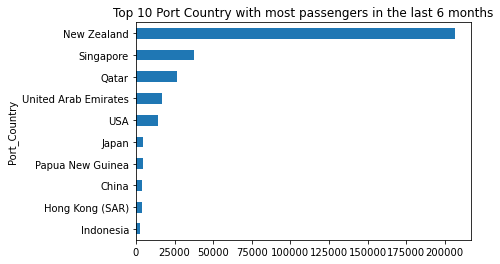

In [98]:
# last 6 months from and to dates
df_last6months = df[(df['Month']>=pd.to_datetime('2021-01-01')) & (df['Month']<=pd.to_datetime('2021-06-01'))]
df_last6months = df_last6months.groupby(['Port_Country'])['Passengers_In'].sum().sort_values(ascending=True)
df_last6months.tail(10).plot(kind='barh',title='Top 10 Port Country with most passengers in the last 6 months');
# Answer = New Zealand

## What is the 3 month rolling average of freight arriving to Australia for each airline throughout 2018?

In [62]:
# select all months in 2018 & include 2 months of 2017 to complete the 3month rolling for January-18
df_2018 = df[(df['Month']>=pd.to_datetime('2017-11-01')) & (df['Month']<=pd.to_datetime('2018-12-01'))]
# calculate 3 months rolling average for each airline
df_2018_rolling3 = df_2018.groupby(['Month','Airline']).sum()['Freight_In_(tonnes)'].rolling(3).mean().reset_index()
df_2018_rolling3 = df_2018_rolling3[(df_2018_rolling3['Month']>=pd.to_datetime('2018-01-01')) & (df_2018_rolling3['Month']<=pd.to_datetime('2018-12-01'))]
# rename column
df_2018_rolling3 = df_2018_rolling3.rename(columns={'Freight_In_(tonnes)':'Freight_In_(tonnes)_3mths_rolling_Avg'})

In [63]:
# Answer: dataframe containing monthly rolling average per each arriving airline to Australia
df_2018_rolling3

,Month,Airline,Freight_In_(tonnes)_3mths_rolling_Avg
122,2018-01-01,Air Caledonie International,461.321667
123,2018-01-01,Air Canada,227.277667
124,2018-01-01,Air China,395.575000
125,2018-01-01,Air India,442.480333
126,2018-01-01,Air Mauritius,372.701000
...,...,...,...
854,2018-12-01,United Airlines,665.868000
855,2018-12-01,United Parcel Service,741.855000
856,2018-12-01,Vietnam Airlines,899.600333
857,2018-12-01,Virgin Australia,1161.323667


In [64]:
# example country
df_2018_rolling3[df_2018_rolling3['Airline']=='Air Canada']

,Month,Airline,Freight_In_(tonnes)_3mths_rolling_Avg
123,2018-01-01,Air Canada,227.277667
184,2018-02-01,Air Canada,217.463667
244,2018-03-01,Air Canada,190.191333
305,2018-04-01,Air Canada,272.959333
366,2018-05-01,Air Canada,309.532333
428,2018-06-01,Air Canada,329.913667
490,2018-07-01,Air Canada,267.318000
552,2018-08-01,Air Canada,337.193333
614,2018-09-01,Air Canada,268.668000
676,2018-10-01,Air Canada,265.421000


In [99]:
# Additional: 
# look into the mean of 3month rolling by Air Canada
df_2018_rolling3[df_2018_rolling3['Airline']=='Air Canada'].groupby('Airline').mean()

,Freight_In_(tonnes)_3mths_rolling_Avg
Airline,
Air Canada,270.342083


In [100]:
# mean of 3months rolling mean by Airline for 2018 
df_2018_rolling3.groupby('Airline').mean().sort_values(by='Freight_In_(tonnes)_3mths_rolling_Avg', ascending=False)

,Freight_In_(tonnes)_3mths_rolling_Avg
Airline,
Qatar Airways,2746.267833
Singapore Airlines,2590.195111
South African Airways,2589.366556
Royal Brunei Airlines,2566.628028
Solomon Airlines,2563.754000
...,...
Beijing Capital Airlines,128.544528
SriLankan Airlines,107.071361
Batik Air Indonesia,69.596250


In [67]:
# END OF SOLUTION